In [1]:
#importing the libraries
import pandas as pd #loads csv file and creates a pandas data frame for data processing
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline 
import numpy as np #linear algebra
import time
import datetime


In [2]:
data = pd.read_csv("dubai_climate_data_1h.csv") #creates a pandas DataFrame from the CSV file

In [3]:
data.info() #outputs information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_id           96432 non-null  int64  
 1   date             96432 non-null  object 
 2   time             96432 non-null  int64  
 3   isdaytime        96432 non-null  object 
 4   tempC            96432 non-null  int64  
 5   tempF            96432 non-null  int64  
 6   windspeedMiles   96432 non-null  int64  
 7   windspeedKmph    96432 non-null  int64  
 8   winddirdegree    96432 non-null  int64  
 9   winddir16point   96432 non-null  object 
 10  weatherCode      96432 non-null  int64  
 11  weatherIconUrl   96432 non-null  object 
 12  weatherDesc      96432 non-null  object 
 13  precipMM         96432 non-null  float64
 14  precipInches     96432 non-null  float64
 15  humidity         96432 non-null  int64  
 16  visibilityKm     96432 non-null  int64  
 17  visibilityMi

In [4]:
data.head(20) #outputs the first n amount of rows, default

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex
0,1,2010-01-01,0,no,21,69,4,7,95,E,...,69,13,56,21,69,8,13,21,69,1
1,1,2010-01-01,100,no,20,68,4,7,102,ESE,...,68,13,55,20,68,8,12,20,68,1
2,1,2010-01-01,200,no,20,68,4,7,109,ESE,...,68,12,53,20,68,7,12,20,68,1
3,1,2010-01-01,300,no,20,67,4,7,117,ESE,...,67,11,52,20,67,7,11,20,67,1
4,1,2010-01-01,400,no,19,66,6,9,131,SE,...,66,10,51,19,66,10,17,19,66,1
5,1,2010-01-01,500,no,19,66,7,12,145,SE,...,66,10,49,19,66,14,22,19,66,1
6,1,2010-01-01,600,no,18,65,9,14,160,SSE,...,65,9,48,18,65,17,27,18,65,1
7,1,2010-01-01,700,yes,20,67,9,14,175,S,...,68,9,47,20,67,15,24,20,67,5
8,1,2010-01-01,800,yes,21,69,9,14,189,S,...,72,8,47,21,69,13,21,21,69,6
9,1,2010-01-01,900,yes,22,72,9,14,204,SSW,...,75,8,47,22,72,11,18,24,75,6


In [5]:
data['date'] = pd.to_datetime(data['date'])
data.index=data['date']
del data['date']

In [6]:
data['time'] = data['time'].div(100)

In [7]:
data = data.drop(['loc_id','isdaytime','tempF','windspeedMiles','winddirdegree','winddir16point','weatherCode','weatherIconUrl','weatherDesc','precipInches','visibilityKm','visibilityMiles','pressureInches','HeatIndexC','HeatIndexF','DewPointC','DewPointF','WindChillC','WindChillF','WindGustMiles','WindGustKmph','FeelsLikeC','FeelsLikeF','uvIndex','windspeedKmph','precipMM','pressureMB','cloudcover'],axis=1)

In [8]:
data.head(48)

,time,tempC,humidity
date,,,
2010-01-01,0.0,21,63
2010-01-01,1.0,20,61
2010-01-01,2.0,20,60
2010-01-01,3.0,20,59
2010-01-01,4.0,19,57
2010-01-01,5.0,19,55
2010-01-01,6.0,18,54
2010-01-01,7.0,20,49
2010-01-01,8.0,21,45


In [9]:
data.isnull().sum()

time        0
tempC       0
humidity    0
dtype: int64

In [10]:
data.describe()

,time,tempC,humidity
count,96432.000000,96432.000000,96432.000000
mean,11.500000,29.180044,52.689678
std,6.922222,5.819486,11.317860
min,0.000000,12.000000,18.000000
25%,5.750000,24.000000,44.000000
50%,11.500000,30.000000,52.000000
75%,17.250000,34.000000,61.000000
max,23.000000,43.000000,86.000000


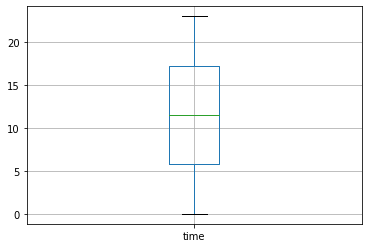

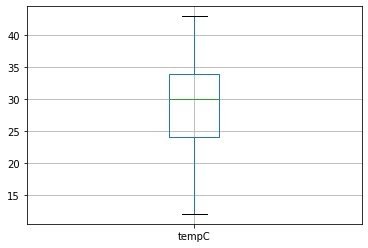

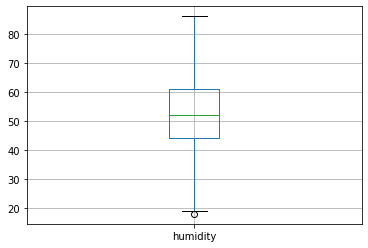

In [11]:
for column in data:
    plt.figure()
    data.boxplot([column])

In [12]:
temp_data = data.filter(['tempC','time'],axis=1)
humid_data = data.filter(['humidity','time'],axis=1)

In [13]:
temp_data.head(30)

,tempC,time
date,,
2010-01-01,21,0.0
2010-01-01,20,1.0
2010-01-01,20,2.0
2010-01-01,20,3.0
2010-01-01,19,4.0
2010-01-01,19,5.0
2010-01-01,18,6.0
2010-01-01,20,7.0
2010-01-01,21,8.0


In [14]:
humid_data.head(20)

,humidity,time
date,,
2010-01-01,63,0.0
2010-01-01,61,1.0
2010-01-01,60,2.0
2010-01-01,59,3.0
2010-01-01,57,4.0
2010-01-01,55,5.0
2010-01-01,54,6.0
2010-01-01,49,7.0
2010-01-01,45,8.0


In [15]:
#Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

result_temp = adfuller(temp_data.tempC)
print(f'ADF Statistic : {result_temp[0]}')
print(f'p-value: {result_temp[1]}')
print('Critical Values: ')
for key, value in result_temp[4].items():
    print(f'\t{key}: {value}')

print('######################################')

result_humid = adfuller(humid_data.humidity)
print(f'ADF Statistic : {result_humid[0]}')
print(f'p-value: {result_humid[1]}')
print('Critical Values: ')
for key, value in result_humid[4].items():
    print(f'\t{key}: {value}')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


KeyboardInterrupt: 

In [16]:
temp_data

,tempC,time
date,,
2010-01-01,21,0.0
2010-01-01,20,1.0
2010-01-01,20,2.0
2010-01-01,20,3.0
2010-01-01,19,4.0
...,...,...
2020-12-31,22,19.0
2020-12-31,21,20.0
2020-12-31,21,21.0


In [80]:
def get_difference(dataset,interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

temp_data_diff = get_difference(temp_data.tempC, 8760)

In [81]:
temp_data_diff = pd.DataFrame(temp_data_diff)

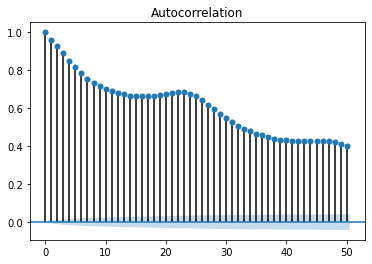

In [82]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temp_data_diff,lags=50)
plt.show()

In [83]:
#Feature Engineering

#Time Lag - Serial Dependence
temp_data['Lag_1'] = temp_data['tempC'].shift(1)
temp_data['Lag_2'] = temp_data['tempC'].shift(2)
temp_data['Lag_3'] = temp_data['tempC'].shift(3)
temp_data['Lag_4'] = temp_data['tempC'].shift(4)
temp_data['Lag_5'] = temp_data['tempC'].shift(5)
temp_data['Lag_6'] = temp_data['tempC'].shift(6)
temp_data['Lag_7'] = temp_data['tempC'].shift(7)
temp_data['Lag_8'] = temp_data['tempC'].shift(8)
temp_data['Lag_9'] = temp_data['tempC'].shift(9)
temp_data['Lag_10'] = temp_data['tempC'].shift(10)
temp_data['Lag_11'] = temp_data['tempC'].shift(11)
temp_data['Lag_12'] = temp_data['tempC'].shift(12)
temp_data['Lag_13'] = temp_data['tempC'].shift(13)
temp_data['Lag_14'] = temp_data['tempC'].shift(14)
temp_data['Lag_15'] = temp_data['tempC'].shift(15)
temp_data['Lag_16'] = temp_data['tempC'].shift(16)
temp_data['Lag_17'] = temp_data['tempC'].shift(17)
temp_data['Lag_18'] = temp_data['tempC'].shift(18)
temp_data['Lag_19'] = temp_data['tempC'].shift(19)
temp_data['Lag_20'] = temp_data['tempC'].shift(20)
temp_data['Lag_21'] = temp_data['tempC'].shift(21)
temp_data['Lag_22'] = temp_data['tempC'].shift(22)
temp_data['Lag_23'] = temp_data['tempC'].shift(23)
temp_data['Lag_24'] = temp_data['tempC'].shift(24)

temp_data = temp_data.reindex(columns=['tempC','time','Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag_7','Lag_8','Lag_9','Lag_10','Lag_11','Lag_12','Lag_13','Lag_14','Lag_15','Lag_16','Lag_17','Lag_18','Lag_19','Lag_20','Lag_21','Lag_22','Lag_23','Lag_24'])
temp_data = temp_data.iloc[24:,:]

#Adding a new column which corresponds to seasons, hour of the day and day of year
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]
winter = [12,1,2]
temp_data['Spring'] = temp_data.index.get_level_values(0).month.isin(spring).astype(int)
temp_data['Summer'] = temp_data.index.get_level_values(0).month.isin(summer).astype(int)
temp_data['Autumn'] = temp_data.index.get_level_values(0).month.isin(autumn).astype(int)
temp_data['Winter'] = temp_data.index.get_level_values(0).month.isin(winter).astype(int)
temp_data['dayofyear'] = pd.DatetimeIndex(temp_data.index).dayofyear
temp_data


,tempC,time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,...,Lag_20,Lag_21,Lag_22,Lag_23,Lag_24,Spring,Summer,Autumn,Winter,dayofyear
date,,,,,,,,,,,,,,,,,,,,,
2010-01-02,18,0.0,19.0,19.0,19.0,20.0,20.0,20.0,21.0,21.0,...,19.0,20.0,20.0,20.0,NaN,0,0,0,1,2
2010-01-02,18,1.0,18.0,19.0,19.0,19.0,20.0,20.0,20.0,21.0,...,19.0,19.0,20.0,20.0,NaN,0,0,0,1,2
2010-01-02,18,2.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,20.0,...,18.0,19.0,19.0,20.0,NaN,0,0,0,1,2
2010-01-02,18,3.0,18.0,18.0,18.0,19.0,19.0,19.0,20.0,20.0,...,20.0,18.0,19.0,19.0,NaN,0,0,0,1,2
2010-01-02,18,4.0,18.0,18.0,18.0,18.0,19.0,19.0,19.0,20.0,...,21.0,20.0,18.0,19.0,NaN,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,22,19.0,22.0,23.0,23.0,24.0,24.0,24.0,24.0,23.0,...,20.0,20.0,21.0,21.0,21.0,0,0,0,1,366
2020-12-31,21,20.0,22.0,22.0,23.0,23.0,24.0,24.0,24.0,24.0,...,20.0,20.0,20.0,21.0,22.0,0,0,0,1,366
2020-12-31,21,21.0,21.0,22.0,22.0,23.0,23.0,24.0,24.0,24.0,...,19.0,20.0,20.0,20.0,23.0,0,0,0,1,366


In [85]:

#Feature Engineering

#Time Lag - Serial Dependence
humid_data['Lag_1'] = humid_data['humidity'].shift(1)
humid_data['Lag_2'] = humid_data['humidity'].shift(2)
humid_data['Lag_3'] = humid_data['humidity'].shift(3)
humid_data['Lag_4'] = humid_data['humidity'].shift(4)
humid_data['Lag_5'] = humid_data['humidity'].shift(5)
humid_data['Lag_6'] = humid_data['humidity'].shift(6)
humid_data['Lag_7'] = humid_data['humidity'].shift(7)
humid_data['Lag_8'] = humid_data['humidity'].shift(8)
humid_data['Lag_9'] = humid_data['humidity'].shift(9)
humid_data['Lag_10'] = humid_data['humidity'].shift(10)
humid_data['Lag_11'] = humid_data['humidity'].shift(11)
humid_data['Lag_12'] = humid_data['humidity'].shift(12)
humid_data['Lag_13'] = humid_data['humidity'].shift(13)
humid_data['Lag_14'] = humid_data['humidity'].shift(14)
humid_data['Lag_15'] = humid_data['humidity'].shift(15)
humid_data['Lag_16'] = humid_data['humidity'].shift(16)
humid_data['Lag_17'] = humid_data['humidity'].shift(17)
humid_data['Lag_18'] = humid_data['humidity'].shift(18)
humid_data['Lag_19'] = humid_data['humidity'].shift(19)
humid_data['Lag_20'] = humid_data['humidity'].shift(20)
humid_data['Lag_21'] = humid_data['humidity'].shift(21)
humid_data['Lag_22'] = humid_data['humidity'].shift(22)
humid_data['Lag_23'] = humid_data['humidity'].shift(23)
humid_data['Lag_24'] = humid_data['humidity'].shift(24)

humid_data = humid_data.reindex(columns=['humidity','time','Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag_7','Lag_8','Lag_9','Lag_10','Lag_11','Lag_12','Lag_13','Lag_14','Lag_15','Lag_16','Lag_17','Lag_18','Lag_19','Lag_20','Lag_21','Lag_22','Lag_23','Lag_24'])
humid_data = humid_data.iloc[24:,:]

#Adding a new column which corresponds to seasons, hour of the day and day of year
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]
winter = [12,1,2]
humid_data['Spring'] = humid_data.index.get_level_values(0).month.isin(spring).astype(int)
humid_data['Summer'] = humid_data.index.get_level_values(0).month.isin(summer).astype(int)
humid_data['Autumn'] = humid_data.index.get_level_values(0).month.isin(autumn).astype(int)
humid_data['Winter'] = humid_data.index.get_level_values(0).month.isin(winter).astype(int)
humid_data['dayofyear'] = pd.DatetimeIndex(humid_data.index).dayofyear
humid_data


,humidity,time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,...,Lag_20,Lag_21,Lag_22,Lag_23,Lag_24,Spring,Summer,Autumn,Winter,dayofyear
date,,,,,,,,,,,,,,,,,,,,,
2010-01-02,75,0.0,75.0,74.0,73.0,73.0,72.0,72.0,69.0,65.0,...,57.0,59.0,60.0,61.0,NaN,0,0,0,1,2
2010-01-02,76,1.0,75.0,75.0,74.0,73.0,73.0,72.0,72.0,69.0,...,55.0,57.0,59.0,60.0,NaN,0,0,0,1,2
2010-01-02,76,2.0,76.0,75.0,75.0,74.0,73.0,73.0,72.0,72.0,...,54.0,55.0,57.0,59.0,NaN,0,0,0,1,2
2010-01-02,76,3.0,76.0,76.0,75.0,75.0,74.0,73.0,73.0,72.0,...,49.0,54.0,55.0,57.0,NaN,0,0,0,1,2
2010-01-02,76,4.0,76.0,76.0,76.0,75.0,75.0,74.0,73.0,73.0,...,45.0,49.0,54.0,55.0,NaN,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,54,19.0,54.0,51.0,48.0,45.0,45.0,45.0,45.0,48.0,...,52.0,51.0,50.0,49.0,49.0,0,0,0,1,366
2020-12-31,54,20.0,54.0,54.0,51.0,48.0,45.0,45.0,45.0,45.0,...,53.0,52.0,51.0,50.0,46.0,0,0,0,1,366
2020-12-31,54,21.0,54.0,54.0,54.0,51.0,48.0,45.0,45.0,45.0,...,54.0,53.0,52.0,51.0,43.0,0,0,0,1,366


In [ ]:
temp_data.plot(y='tempC', kind='line',figsize=(15,10))
plt.ylabel("Temperature")
plt.show()

: 

In [ ]:
humid_data.plot(y='humidity', kind='line',figsize=(15,10))
plt.ylabel("Humidity")
plt.show()

: 

In [ ]:
temp_trial = temp_data.copy()
temp_trial=temp_trial[['tempC']]
temp_trial['SMA_10000']=temp_trial.tempC.rolling(50000,min_periods=10000).mean()
plt.figure(figsize=(15,10))
plt.plot(temp_data['tempC'],label = 'Temperature', color ="orange")
plt.plot(temp_trial['SMA_10000'],label = 'SMA_10000',color='blue')
plt.ylabel("Temperature")
plt.xlabel('date')
plt.show()

: 

In [ ]:
humid_trial = humid_data.copy()
humid_trial=humid_trial[['humidity']]
humid_trial['SMA_10000']=humid_trial.humidity.rolling(90000,min_periods=10000).mean()
plt.figure(figsize=(15,10))
plt.plot(humid_data['humidity'],label = 'Humidity', color ="orange")
plt.plot(humid_trial['SMA_10000'],label = 'SMA_10000',color='blue')
plt.ylabel("Humidity")
plt.xlabel('date')
plt.show()

: 

In [ ]:
temp_data.shape

: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def RF(X_train,X_test, y_train,n_estimators, min_samples_split, min_samples_leaf, max_features, max_depth):
    rf_regress = RandomForestRegressor(n_estimators = n_estimators, 
                                        min_samples_split = min_samples_split, 
                                        min_samples_leaf = min_samples_leaf, 
                                        max_features = max_features, 
                                        max_depth = max_depth)

    start = time.time()
    rf_regress.fit(X_train, y_train)
    y_pred_rf = rf_regress.predict(X_test)

    end = time.time()
    rf_time = end-start
    print(rf_regress.feature_importances_)
    return y_pred_rf, rf_time
    

: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def find_opt(X_train,y_train):
    n_estimators = [100,300,500]
    max_features = ['auto','sqrt','log2']
    max_depth = [2,4,6]
    min_samples_split = [2,4,6]
    min_samples_leaf = [2,4,6]

    hyperparameters = {'n_estimators': n_estimators,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                        }
    rfr = RandomForestRegressor(random_state = 42)
    rrfr = RandomizedSearchCV(estimator=rfr, param_distributions=hyperparameters, n_iter=200,random_state = 42, n_jobs = -1,verbose =10)

    rrfr.fit(X_train,y_train)
    print(rrfr.best_params_)

: 

In [ ]:
from sklearn.preprocessing import StandardScaler

def standard_scale(X_train,X_test):
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    return X_train,X_test

: 

In [ ]:
from sklearn.linear_model import LinearRegression

def LR(X_train,X_test, y_train): #Linear Regression

    lr = LinearRegression()
    X_train,X_test = standard_scale(X_train,X_test)
    
    start = time.time() 
    lr.fit(X_train,y_train)

    y_pred_lr = lr.predict(X_test)
    end = time.time()

    lr_time = end-start
    print(lr.coef_)
    return y_pred_lr, lr_time

: 

In [ ]:
from sklearn.linear_model import LassoCV

def lasso_find_opt(X_train,y_train):
    model = LassoCV(cv=5, random_state=42,max_iter=5000)
    model.fit(X_train, y_train)

    return model.alpha_

: 

In [ ]:
from sklearn.linear_model import Lasso

def L1reg(X_train,X_test,y_train,alpha): #Lasso Regression

    lasso = Lasso(alpha=alpha)
    X_train,X_test = standard_scale(X_train,X_test)

    start = time.time()
    lasso.fit(X_train,y_train)

    y_pred_lasso = lasso.predict(X_test)
    end=time.time()

    lasso_time=end-start
    print(lasso.coef_)
    return y_pred_lasso,lasso_time



: 

In [ ]:
from sklearn.linear_model import RidgeCV

def ridge_find_opt(X_train,y_train,alphas):
    model = RidgeCV(cv=5,alphas=alphas)
    model.fit(X_train, y_train)

    return model.alpha_


: 

In [ ]:
from sklearn.linear_model import Ridge

def L2reg(X_train,X_test,y_train,alpha):

    ridge = Ridge(alpha=alpha)
    X_train,X_test = standard_scale(X_train,X_test)

    start = time.time()
    ridge.fit(X_train,y_train)

    y_pred_ridge = ridge.predict(X_test)
    end=time.time()

    ridge_time = end-start
    print(ridge.coef_)
    print(ridge.feature_names_in_)

    return y_pred_ridge, ridge_time

: 

In [ ]:
from sklearn import metrics
import math

def evaluate_ml(y_test,y_pred_rf,y_pred_lr, y_pred_lasso,y_pred_ridge,rf_time,lr_time,lasso_time,ridge_time):
    #MAE
    print("\nMAE:\n")
    print("RF Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_rf), 4))
    print("LR Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_lr), 4))
    print("Lasso Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_lasso), 4))
    print("Ridge Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_ridge), 4))

    #RMSE
    print("\nRMSE:\n")
    print("RF RMSE:", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)), 4))
    print("LR RMSE:", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)), 4))
    print("Lasso RMSE:", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)), 4))
    print("Ridge RMSE:", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)), 4))

    #Time
    print("\nTime Complexity:\n")
    print(f'RF Time: {round(rf_time,3)} seconds')
    print(f'LR Time: {round(lr_time,3)} seconds')
    print(f'Lasso Time: {round(lasso_time,3)} seconds')
    print(f'Ridge Time: {round(ridge_time,3)} seconds')

: 

In [ ]:
#Temperature
temp_data0 = temp_data.reset_index(drop=True)

temp_train, temp_test= np.split(temp_data0, [int(.60 *len(temp_data0))]) #splitting the dataframe into 98% for training and 2% for testing, whcih is roughly around 6 months 
X_train_temp = temp_train.loc[:, temp_train.columns != 'tempC']
X_test_temp = temp_test.loc[:,temp_test.columns != 'tempC']
y_train_temp = temp_train['tempC']
y_test_temp = temp_test['tempC']

: 

In [ ]:
#Humidity
humid_data0 = humid_data.reset_index(drop=True)

humid_train, humid_test= np.split(humid_data0, [int(.60 *len(humid_data0))]) #splitting the dataframe into 98% for training and 2% for testing, whcih is roughly around 6 months 
X_train_humid = humid_train.loc[:, humid_train.columns != 'humidity']
X_test_humid = humid_test.loc[:,humid_test.columns != 'humidity']
y_train_humid = humid_train['humidity']
y_test_humid = humid_test['humidity']

: 

In [ ]:
alphas = np.logspace(3,-4,20)
lasso_temp_alpha = lasso_find_opt(X_train_temp,y_train_temp)
lasso_humid_alpha = lasso_find_opt(X_train_humid,y_train_humid)
ridge_temp_alpha = ridge_find_opt(X_train_temp,y_train_temp,alphas)
ridge_humid_alpha = ridge_find_opt(X_train_humid,y_train_humid,alphas)

: 

In [ ]:
# find_opt(X_train_temp,y_train_temp)
# {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 6}

: 

In [ ]:
# find_opt(X_train_humid,y_train_humid)
# {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 6}

: 

In [ ]:
print(X_train_humid)

: 

In [ ]:
print("Humidity Results")
y_pred_rf_humid, rf_time_humid = RF(X_train_humid, X_test_humid, y_train_humid, 300, 2, 6, 'auto', 6)
y_pred_lr_humid, lr_time_humid = LR(X_train_humid, X_test_humid, y_train_humid)
y_pred_lasso_humid, lasso_time_humid = L1reg(X_train_humid, X_test_humid, y_train_humid, lasso_humid_alpha)
y_pred_ridge_humid, ridge_time_humid = L2reg(X_train_humid, X_test_humid, y_train_humid, ridge_humid_alpha)

evaluate_ml(y_test_humid,y_pred_rf_humid,y_pred_lr_humid, y_pred_lasso_humid,y_pred_ridge_humid,rf_time_humid,lr_time_humid,lasso_time_humid,ridge_time_humid)

: 

In [ ]:
print("Temperature Results")
y_pred_rf_temp, rf_time_temp = RF(X_train_temp, X_test_temp, y_train_temp, 500, 4, 6, 'auto', 6)
y_pred_lr_temp, lr_time_temp = LR(X_train_temp, X_test_temp, y_train_temp)
y_pred_lasso_temp, lasso_time_temp = L1reg(X_train_temp, X_test_temp, y_train_temp, lasso_temp_alpha)
y_pred_ridge_temp, ridge_time_temp = L2reg(X_train_temp, X_test_temp, y_train_temp, ridge_temp_alpha)

evaluate_ml(y_test_temp,y_pred_rf_temp,y_pred_lr_temp, y_pred_lasso_temp,y_pred_ridge_temp,rf_time_temp,lr_time_temp,lasso_time_temp,ridge_time_temp)

: 

In [ ]:
y_test_temp = y_test_temp.to_numpy()
y_test_humid = y_test_humid.to_numpy()

: 

In [ ]:
y_pred_rf_temp

: 

In [ ]:
len(y_pred_rf_humid)

: 

In [ ]:
rf_data = pd.DataFrame({'RF_tempC':y_pred_rf_temp,'RF_humidity':y_pred_rf_humid},columns = ['RF_tempC','RF_humidity'])
lr_data = pd.DataFrame({'LR_tempC':y_pred_lr_temp,'LR_humidity':y_pred_lr_humid},columns = ['LR_tempC','LR_humidity'])
lasso_data = pd.DataFrame({'Lasso_tempC':y_pred_lasso_temp,'Lasso_humidity':y_pred_lasso_humid},columns = ['Lasso_tempC','Lasso_humidity'])
ridge_data = pd.DataFrame({'Ridge_tempC':y_pred_ridge_temp,'Ridge_humidity':y_pred_ridge_humid},columns = ['Ridge_tempC','Ridge_humidity'])
actual_data = pd.DataFrame({'Real_tempC':y_test_temp,'Real_humidity':y_test_humid},columns = ['Real_tempC','Real_humidity'])

: 

In [ ]:
lasso_data.head(20)

: 

In [ ]:
rf_wet_bulb = []
lr_wet_bulb = []
lasso_wet_bulb = []
ridge_wet_bulb = []
real_wet_bulb = []
rf_normal= []
lr_normal = []
lasso_normal = []
ridge_normal = []
real_normal = []
for index,row in rf_data.iterrows():
    rf_wb_temp = row["RF_tempC"]*math.atan(0.151977*((row["RF_humidity"]+8.313659)**0.5))+math.atan(row["RF_tempC"]+row["RF_humidity"])-math.atan(row["RF_humidity"]-1.676331)+0.00391838*(row["RF_humidity"]**1.5)*math.atan(0.023101*row["RF_humidity"])-4.686035
    if rf_wb_temp >=28:
        rf_wet_bulb.append(index)
    else:
        rf_normal.append(index)
for index,row in lr_data.iterrows():
    lr_wb_temp = row["LR_tempC"]*math.atan(0.151977*((row["LR_humidity"]+8.313659)**0.5))+math.atan(row["LR_tempC"]+row["LR_humidity"])-math.atan(row["LR_humidity"]-1.676331)+0.00391838*(row["LR_humidity"]**1.5)*math.atan(0.023101*row["LR_humidity"])-4.686035
    if lr_wb_temp >=28:
        lr_wet_bulb.append(index)
    else:
        lr_normal.append(index)
for index,row in lasso_data.iterrows():
    lasso_wb_temp = row["Lasso_tempC"]*math.atan(0.151977*((row["Lasso_humidity"]+8.313659)**0.5))+math.atan(row["Lasso_tempC"]+row["Lasso_humidity"])-math.atan(row["Lasso_humidity"]-1.676331)+0.00391838*(row["Lasso_humidity"]**1.5)*math.atan(0.023101*row["Lasso_humidity"])-4.686035
    if lasso_wb_temp >=28:
        lasso_wet_bulb.append(index)
    else:
        lasso_normal.append(index)    
for index,row in ridge_data.iterrows():
    ridge_wb_temp = row["Ridge_tempC"]*math.atan(0.151977*((row["Ridge_humidity"]+8.313659)**0.5))+math.atan(row["Ridge_tempC"]+row["Ridge_humidity"])-math.atan(row["Ridge_humidity"]-1.676331)+0.00391838*(row["Ridge_humidity"]**1.5)*math.atan(0.023101*row["Ridge_humidity"])-4.686035
    if ridge_wb_temp>=28:
        ridge_wet_bulb.append(index)
    else:
        ridge_normal.append(index)
for index,row in actual_data.iterrows():
    real_wb_temp = row["Real_tempC"]*math.atan(0.151977*((row["Real_humidity"]+8.313659)**0.5))+math.atan(row["Real_tempC"]+row["Real_humidity"])-math.atan(row["Real_humidity"]-1.676331)+0.00391838*(row["Real_humidity"]**1.5)*math.atan(0.023101*row["Real_humidity"])-4.686035
    if real_wb_temp>=28:
        real_wet_bulb.append(index)
    else:
        real_normal.append(index)


: 

In [ ]:
rf_tcorrect = 0
lr_tcorrect = 0
lasso_tcorrect=0
ridge_tcorrect=0
rf_fcorrect = 0
lr_fcorrect = 0
lasso_fcorrect=0
ridge_fcorrect=0

for ele in rf_wet_bulb:
    if ele in real_wet_bulb:
        rf_tcorrect+=1
    else:
        rf_fcorrect+=1
for ele in lr_wet_bulb:
    if ele in real_wet_bulb:
        lr_tcorrect+=1
    else:
        lr_fcorrect+=1
for ele in lasso_wet_bulb:
    if ele in real_wet_bulb:
        lasso_tcorrect+=1
    else:
        lasso_fcorrect+=1
for ele in ridge_wet_bulb:
    if ele in real_wet_bulb:
        ridge_tcorrect+=1
    else:
        ridge_fcorrect+=1

: 

In [ ]:
rf_tneg = 0
lr_tneg = 0
lasso_tneg = 0
ridge_tneg = 0
rf_fneg = 0
lr_fneg = 0
lasso_fneg =0
ridge_fneg = 0

for ele in rf_normal:
    if ele in real_normal:
        rf_tneg+=1
    else:
        rf_fneg+=1
for ele in lr_normal:
    if ele in real_normal:
        lr_tneg+=1
    else:
        lr_fneg+=1
for ele in lasso_normal:
    if ele in real_normal:
        lasso_tneg+=1
    else:
        lasso_fneg+=1
for ele in ridge_normal:
    if ele in real_normal:
        ridge_tneg+=1
    else:
        ridge_fneg+=1

: 

In [ ]:
print(f"RF precision: {(rf_tcorrect/(rf_tcorrect+rf_fcorrect))*100}")
print(f"LR precision: {(lr_tcorrect/(lr_tcorrect+lr_fcorrect))*100}")
print(f"Lasso precision: {(lasso_tcorrect/(lasso_tcorrect+lasso_fcorrect))*100}")
print(f"Ridge precision: {(ridge_tcorrect/(ridge_tcorrect+ridge_fcorrect))*100}")

print("\n")
print(f"RF recall: {(rf_tcorrect/(rf_tcorrect+rf_fneg))*100}")
print(f"LR recall: {(lr_tcorrect/(lr_tcorrect+lr_fneg))*100}")
print(f"Lasso recall: {(lasso_tcorrect/(lasso_tcorrect+lasso_fneg))*100}")
print(f"Ridge recall: {(ridge_tcorrect/(ridge_tcorrect+ridge_fneg))*100}")

: 

In [ ]:
#F-measure
print(f"RF F-score: {((2*rf_tcorrect)/(2*rf_tcorrect+rf_fcorrect+rf_fneg))*100}")
print(f"LR F-score: {((2*lr_tcorrect)/(2*lr_tcorrect+lr_fcorrect+lr_fneg))*100}")
print(f"Lasso F-score: {((2*lasso_tcorrect)/(2*lasso_tcorrect+lasso_fcorrect+lasso_fneg))*100}")
print(f"Ridge F-score: {((2*ridge_tcorrect)/(2*ridge_tcorrect+ridge_fcorrect+ridge_fneg))*100}")

: 